In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import decomposition
from sklearn import preprocessing
from sklearn import pipeline

In [2]:
df1 = pd.read_csv("churn-bigml-20.csv")
df2 = pd.read_csv("churn-bigml-80.csv")

In [3]:
df = pd.concat([df1,df2],ignore_index=True)

In [4]:
df

State  Account length  Area code International plan Voice mail plan  \
0       LA             117        408                 No              No   
1       IN              65        415                 No              No   
2       NY             161        415                 No              No   
3       SC             111        415                 No              No   
4       HI              49        510                 No              No   
...    ...             ...        ...                ...             ...   
3328    SC              79        415                 No              No   
3329    AZ             192        415                 No             Yes   
3330    WV              68        415                 No              No   
3331    RI              28        510                 No              No   
3332    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
0                         0              184.5               97   
1                         0              129.1              137   
2                         0              332.9               67   
3                         0              110.4              103   
4                         0              119.3              117   
...                     ...                ...              ...   
3328                      0              134.7               98   
3329                     36              156.2               77   
3330                      0              231.1               57   
3331                      0              180.8              109   
3332                     25              234.4              113   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0                31.37              351.6               80             29.89   
1                21.95              228.5               83             19.42   
2                56.59              317.8               97             27.01   
3                18.77              137.3              102             11.67   
4                20.28              215.1              109             18.28   
...                ...                ...              ...               ...   
3328             22.90              189.7               68             16.12   
3329             26.55              215.5              126             18.32   
3330             39.29              153.4               55             13.04   
3331             30.74              288.8               58             24.55   
3332             39.85              265.9               82             22.60   

      Total night minutes  Total night calls  Total night charge  \
0                   215.8                 90                9.71   
1                   208.8                111                9.40   
2                   160.6                128                7.23   
3                   189.6                105                8.53   
4                   178.7                 90                8.04   
...                   ...                ...                 ...   
3328                221.4                128                9.96   
3329                279.1                 83               12.56   
3330                191.3                123                8.61   
3331                191.9                 91                8.64   
3332                241.4                 77               10.86   

      Total intl minutes  Total intl calls  Total intl charge  \
0                    8.7                 4               2.35   
1                   12.7                 6               3.43   
2                    5.4                 9               1.46   
3                    7.7                 6               2.08   
4                   11.1                 1               3.00   
...                  ...               ...                ...   
3328                11.8                 5            

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


In [6]:
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [7]:
df.describe()

Account length    Area code  Number vmail messages  Total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       Total eve charge  Total night minutes  Total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       Total intl charge  Customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [8]:
df['International plan']=df['International plan'].replace(['No','Yes'],[0,1])
df['Voice mail plan']=df['Voice mail plan'].replace(['No','Yes'],[0,1])
df['Churn']=df['Churn'].replace([False,True],[0,1])

In [9]:
df.head()

State  Account length  Area code  International plan  Voice mail plan  \
0    LA             117        408                   0                0   
1    IN              65        415                   0                0   
2    NY             161        415                   0                0   
3    SC             111        415                   0                0   
4    HI              49        510                   0                0   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   
2                      0              332.9               67   
3                      0              110.4              103   
4                      0              119.3              117   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80             29.89   
1             21.95              228.5               83             19.42   
2             56.59              317.8               97             27.01   
3             18.77              137.3              102             11.67   
4             20.28              215.1              109             18.28   

   Total night minutes  Total night calls  Total night charge  \
0                215.8                 90                9.71   
1                208.8                111                9.40   
2                160.6                128                7.23   
3                189.6                105                8.53   
4                178.7                 90                8.04   

   Total intl minutes  Total intl calls  Total intl charge  \
0                 8.7                 4               2.35   
1                12.7                 6               3.43   
2                 5.4                 9               1.46   
3                 7.7                 6               2.08   
4                11.1                 1               3.00   

   Customer service calls  Churn  
0                       1      0  
1                       4      1  
2                       4      1  
3                       2      0  
4                       1      0

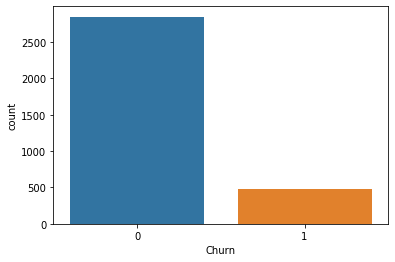

In [10]:
sns.countplot(df['Churn'])

In [11]:
df.corr()

Account length  Area code  International plan  \
Account length                1.000000  -0.012463            0.024735   
Area code                    -0.012463   1.000000            0.048551   
International plan            0.024735   0.048551            1.000000   
Voice mail plan               0.002918  -0.000747            0.006006   
Number vmail messages        -0.004628  -0.001994            0.008745   
Total day minutes             0.006216  -0.008264            0.049396   
Total day calls               0.038470  -0.009646            0.003755   
Total day charge              0.006214  -0.008264            0.049398   
Total eve minutes            -0.006757   0.003580            0.019100   
Total eve calls               0.019260  -0.011886            0.006114   
Total eve charge             -0.006745   0.003607            0.019106   
Total night minutes          -0.008955  -0.005825           -0.028905   
Total night calls            -0.013176   0.016522            0.012451   
Total night charge           -0.008960  -0.005845           -0.028913   
Total intl minutes            0.009514  -0.018288            0.045871   
Total intl calls              0.020661  -0.024179            0.017366   
Total intl charge             0.009546  -0.018395            0.045780   
Customer service calls       -0.003796   0.027572           -0.024522   
Churn                         0.016541   0.006174            0.259852   

                        Voice mail plan  Number vmail messages  \
Account length                 0.002918              -0.004628   
Area code                     -0.000747              -0.001994   
International plan             0.006006               0.008745   
Voice mail plan                1.000000               0.956927   
Number vmail messages          0.956927               1.000000   
Total day minutes             -0.001684               0.000778   
Total day calls               -0.011086              -0.009548   
Total day charge              -0.001686               0.000776   
Total eve minutes              0.021545               0.017562   
Total eve calls               -0.006444              -0.005864   
Total eve charge               0.021559               0.017578   
Total night minutes            0.006079               0.007681   
Total night calls              0.015553               0.007123   
Total night charge             0.006064               0.007663   
Total intl minutes            -0.001318               0.002856   
Total intl calls               0.007618               0.013957   
Total intl charge             -0.001276               0.002884   
Customer service calls        -0.017824              -0.013263   
Churn                         -0.102148              -0.089728   

                        Total day minutes  Total day calls  Total day charge  \
Account length                   0.006216         0.038470          0.006214   
Area code                       -0.008264        -0.009646         -0.008264   
International plan               0.049396         0.003755          0.049398   
Voice mail plan                 -0.001684        -0.011086         -0.001686   
Number vmail messages            0.000778        -0.009548          0.000776   
Total day minutes                1.000000         0.006750          1.000000   
Total day calls                  0.006750         1.000000          0.006753   
Total day charge                 1.000000         0.006753          1.000000   
Total eve minutes                0.007043        -0.021451          0.007050   
Total eve calls                  0.015769         0.006462          0.015769   
Total eve charge                 0.007029        -0.021449          0.007036   
Total night minutes              0.004323         0.022938          0.004324   
Total night calls                0.022972        -0.019557          0.022972   
Total night charge               0.004300         0.022927          0.004301   
Total intl minutes              -0.010155 

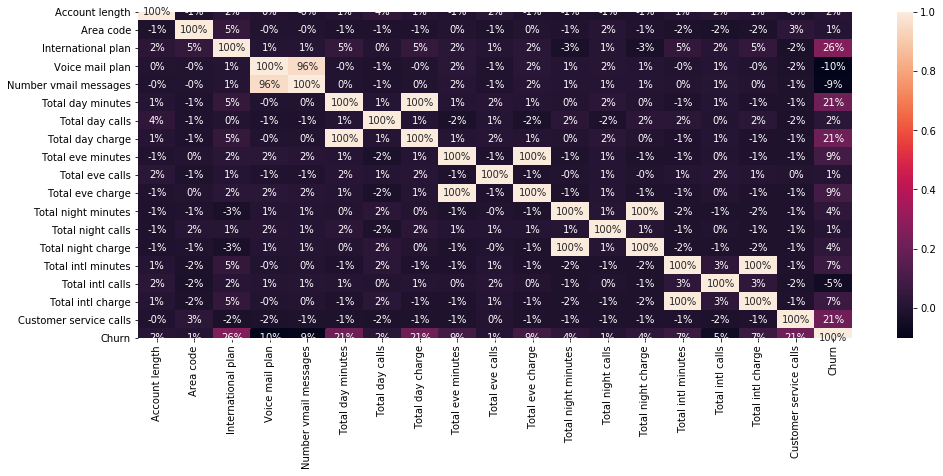

In [12]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [13]:
df=df.drop(['State','Total day charge','Total intl charge','Total night charge','Total eve charge'], axis=1)

In [14]:
df

Account length  Area code  International plan  Voice mail plan  \
0                117        408                   0                0   
1                 65        415                   0                0   
2                161        415                   0                0   
3                111        415                   0                0   
4                 49        510                   0                0   
...              ...        ...                 ...              ...   
3328              79        415                   0                0   
3329             192        415                   0                1   
3330              68        415                   0                0   
3331              28        510                   0                0   
3332              74        415                   0                1   

      Number vmail messages  Total day minutes  Total day calls  \
0                         0              184.5               97   
1                         0              129.1              137   
2                         0              332.9               67   
3                         0              110.4              103   
4                         0              119.3              117   
...                     ...                ...              ...   
3328                      0              134.7               98   
3329                     36              156.2               77   
3330                      0              231.1               57   
3331                      0              180.8              109   
3332                     25              234.4              113   

      Total eve minutes  Total eve calls  Total night minutes  \
0                 351.6               80                215.8   
1                 228.5               83                208.8   
2                 317.8               97                160.6   
3                 137.3              102                189.6   
4                 215.1              109                178.7   
...                 ...              ...                  ...   
3328              189.7               68                221.4   
3329              215.5              126                279.1   
3330              153.4               55                191.3   
3331              288.8               58                191.9   
3332              265.9               82                241.4   

      Total night calls  Total intl minutes  Total intl calls  \
0                    90                 8.7                 4   
1                   111                12.7                 6   
2                   128                 5.4                 9   
3                   105                 7.7                 6   
4                    90                11.1                 1   
...                 ...                 ...               ...   
3328                128                11.8                 5   
3329                 83                 9.9                 6   
3330                123                 9.6                 4   
3331                 91                14.1                 6   
3332                 77                13.7                 4   

      Customer service calls  Churn  
0                          1      0  
1                          4      1  
2                          4      1  
3                          2      0  
4                          1      0  
...                      ...    ...  
3328                       2      0  
3329                       2      0  
3330                       3      0  
3331                       2      0  
3332                       0      0  

[3333 rows x 15 columns]

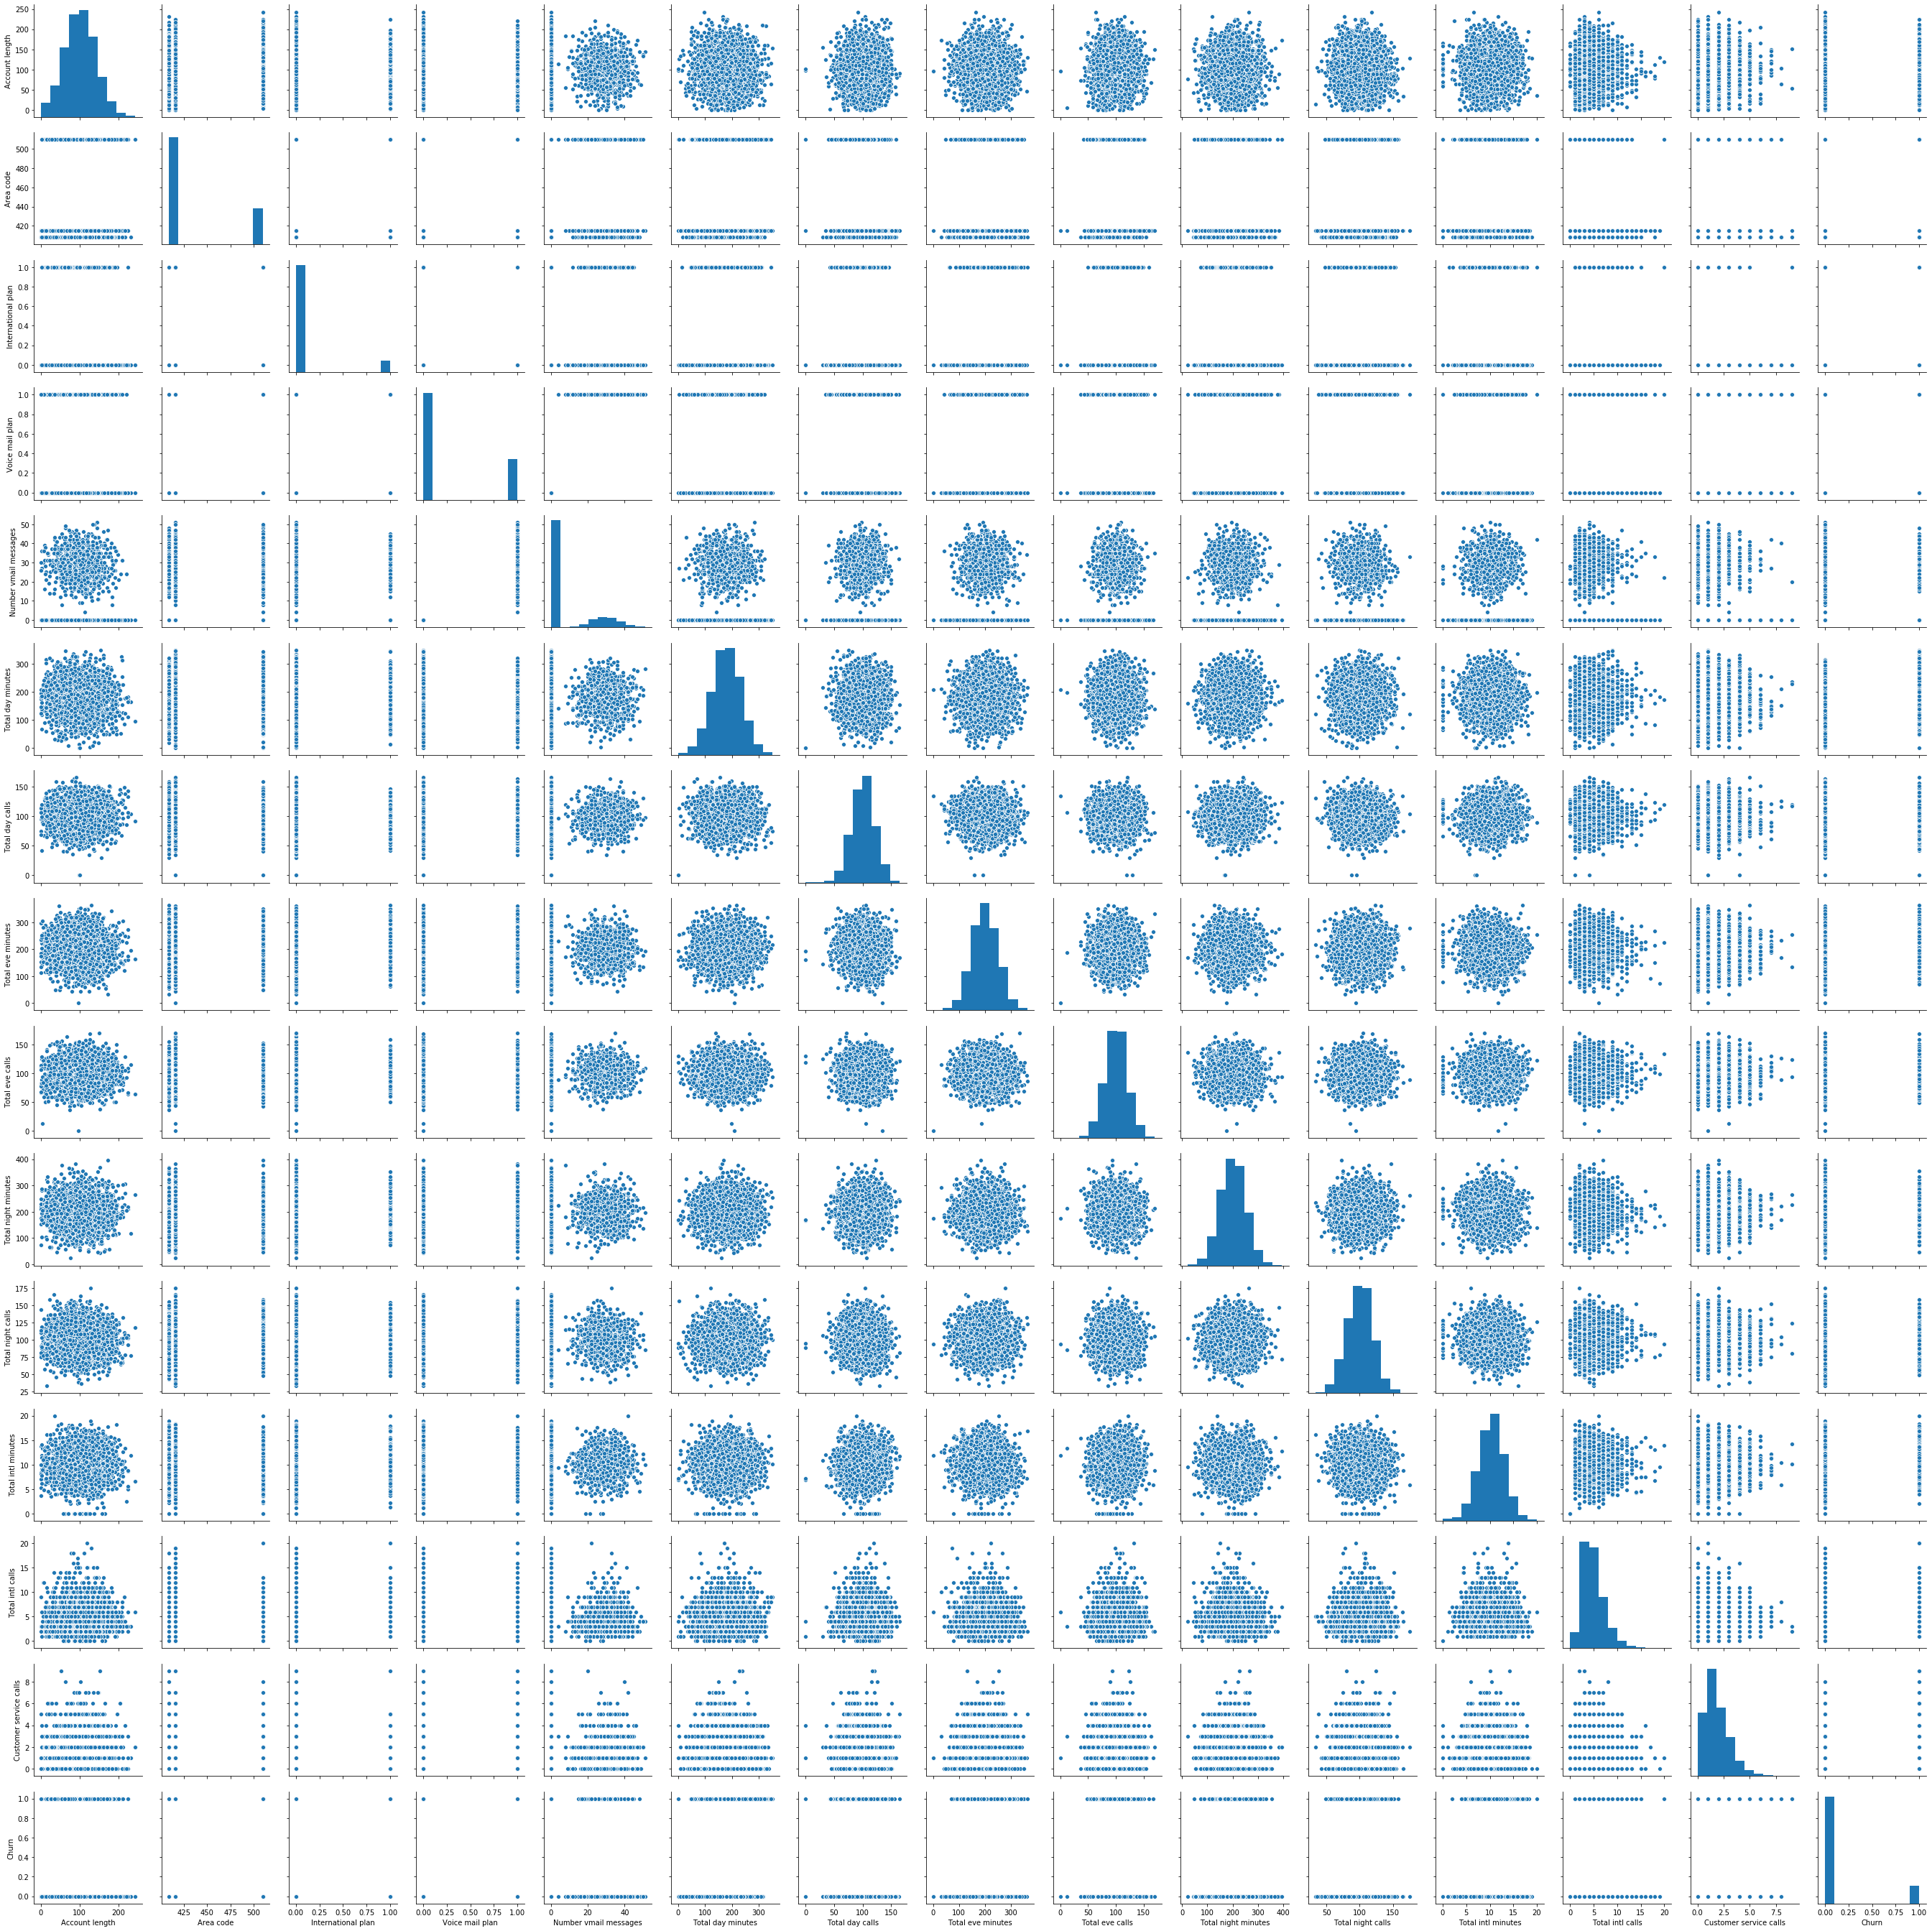

In [15]:
sns.pairplot( df )

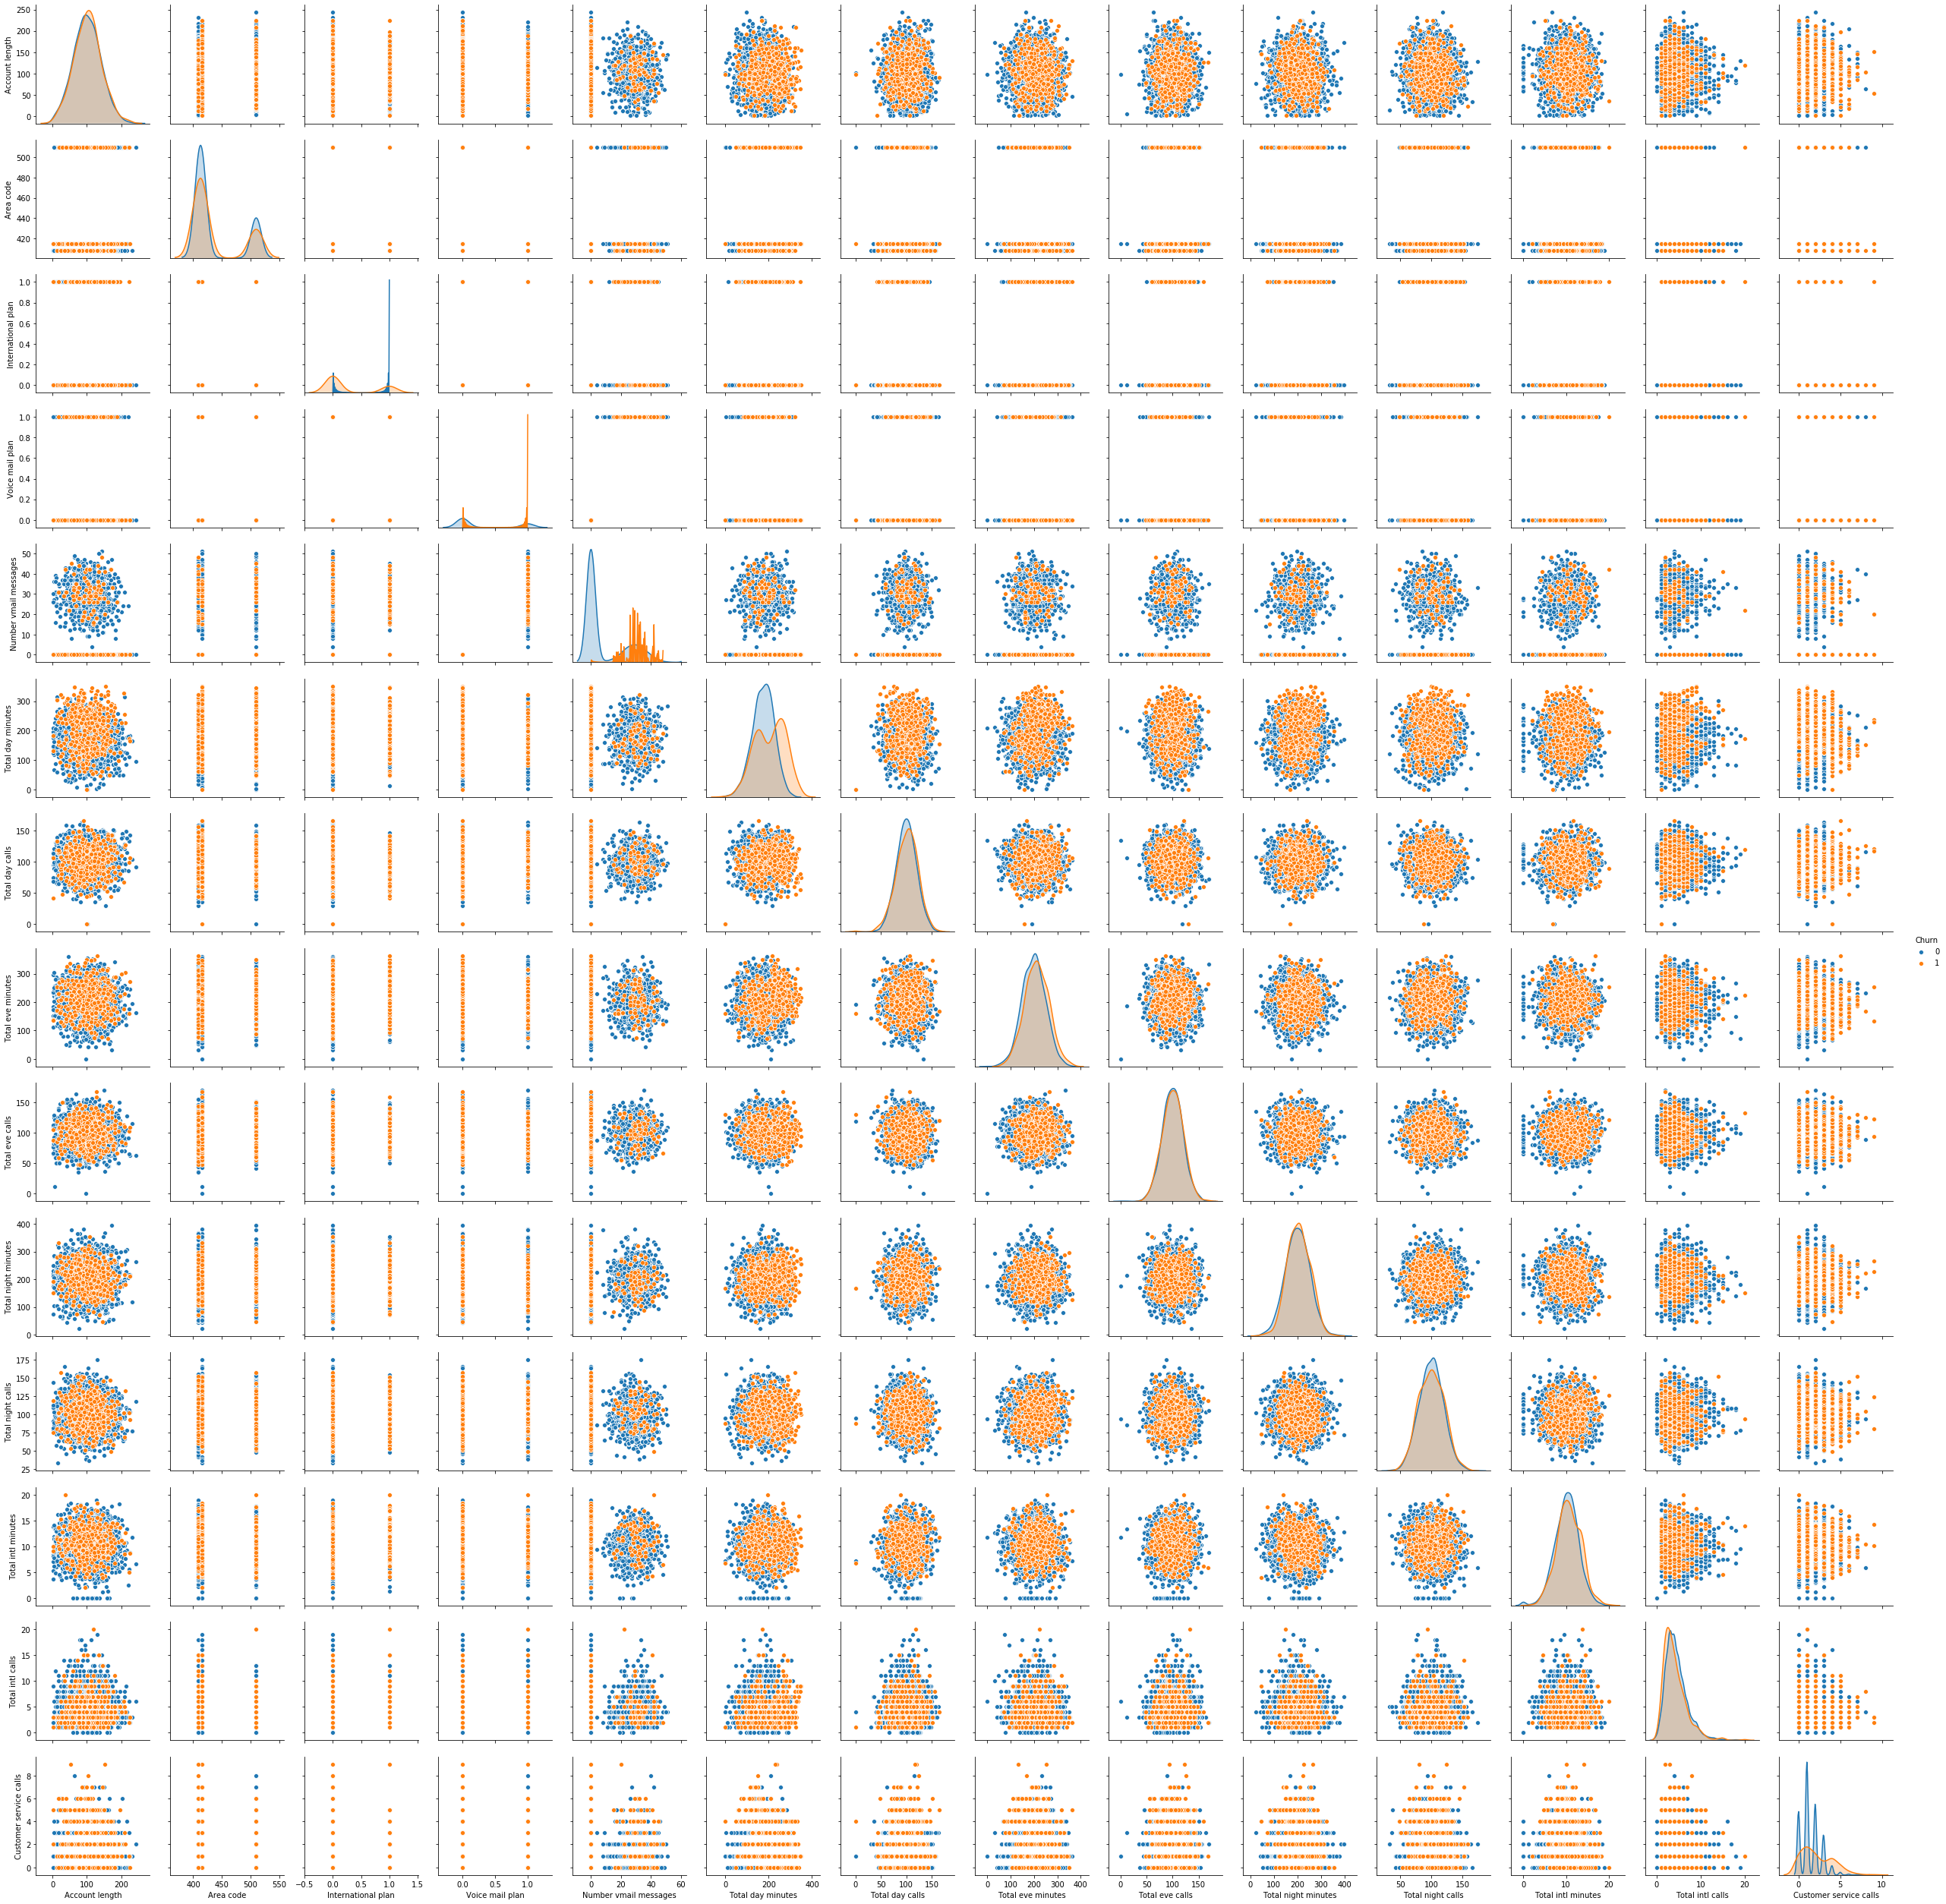

In [16]:
sns.pairplot(df,vars=df.columns[:-1], hue="Churn")

In [17]:
x = df.drop('Churn',axis=1)
y = df['Churn']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
std= StandardScaler()

In [22]:
x_train=std.fit_transform(x_train)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
from sklearn.metrics import recall_score

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lr=LogisticRegression()

In [27]:
lr.fit(x_train,y_train)

C:\Users\Yasoo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
lr_preds=lr.predict(x_train)

In [29]:
lr_preds2=lr.predict(x_test)

In [30]:
accuracy_score(y_train,lr_preds)

0.8574643660915229

In [31]:
accuracy_score(y_test,lr_preds2)

0.15442278860569716

In [32]:
from sklearn.model_selection import cross_validate

In [33]:
cross=cross_validate(lr,x_train,y_train,cv=10,return_train_score = True)

C:\Users\Yasoo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Yasoo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Yasoo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Yasoo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Yasoo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [34]:
np.mean(cross['test_score'])

0.8552279575342852

In [35]:
recall_score(y_train,lr_preds)

0.17894736842105263

In [36]:
recall_score(y_test,lr_preds2)

1.0

In [37]:
from sklearn.naive_bayes import GaussianNB

In [38]:
nb=GaussianNB()

In [39]:
nb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [40]:
nb_preds=nb.predict(x_train)

In [41]:
nb_preds2=nb.predict(x_test)

In [42]:
accuracy_score(y_train,nb_preds)

0.8518379594898725

In [43]:
accuracy_score(y_test,nb_preds2)

0.19640179910044978

In [44]:
cross=cross_validate(nb,x_train,y_train,cv=10,return_train_score = True)

In [45]:
np.mean(cross['test_score'])

0.8499521275097857

In [46]:
recall_score(y_train,nb_preds)

0.4263157894736842

In [47]:
recall_score(y_test,nb_preds2)

0.9611650485436893

In [48]:
from sklearn.linear_model import SGDClassifier

In [49]:
sgd=SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)

In [50]:
sgd.fit(x_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='modified_huber',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=101, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [51]:
sgd_preds=sgd.predict(x_train)

In [52]:
sgd_preds2=sgd.predict(x_test)

In [53]:
accuracy_score(y_train,sgd_preds)

0.7970742685671418

In [54]:
accuracy_score(y_test,sgd_preds2)

0.8455772113943029

In [55]:
recall_score(y_train,sgd_preds)

0.3526315789473684

In [56]:
recall_score(y_test,sgd_preds2)

0.0

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn=KNeighborsClassifier(n_neighbors=15)

In [59]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [60]:
knn_preds=knn.predict(x_train)

In [61]:
knn_preds2=knn.predict(x_test)

In [62]:
accuracy_score(y_train,knn_preds)

0.8825956489122281

In [63]:
accuracy_score(y_test,knn_preds2)

0.5517241379310345

In [64]:
cross=cross_validate(knn,x_train,y_train,cv=10,return_train_score = True)

In [65]:
np.mean(cross['test_score'])

0.8720903382050633

In [66]:
recall_score(y_train,knn_preds)

0.21842105263157896

In [67]:
recall_score(y_test,knn_preds2)

0.6893203883495146

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
tree=DecisionTreeClassifier(max_depth=10,random_state=101,min_samples_leaf=15)

In [70]:
tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=101, splitter='best')

In [71]:
tree_preds=tree.predict(x_train)

In [72]:
tree_preds2=tree.predict(x_test)

In [73]:
accuracy_score(y_train,tree_preds)

0.9508627156789198

In [74]:
accuracy_score(y_test,tree_preds2)

0.8455772113943029

In [75]:
cross=cross_validate(tree,x_train,y_train,cv=10,return_train_score = True)

In [76]:
np.mean(cross['test_score'])

0.9373588465545886

In [77]:
recall_score(y_train,tree_preds)

0.7289473684210527

In [78]:
recall_score(y_test,tree_preds2)

0.0

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rf=RandomForestClassifier(oob_score=True,random_state=101, n_estimators=70,  n_jobs=1, min_samples_leaf=30,max_features=None)

In [81]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=1,
                       oob_score=True, random_state=101, verbose=0,
                       warm_start=False)

In [82]:
rf_preds=rf.predict(x_train)

In [83]:
rf_preds2=rf.predict(x_test)

In [84]:
accuracy_score(y_train,rf_preds)

0.9328582145536384

In [85]:
accuracy_score(y_test,rf_preds2)

0.15592203898050974

In [86]:
cross=cross_validate(rf,x_train,y_train,cv=10,return_train_score = True)

In [87]:
np.mean(cross['test_score'])

0.9155965757089352

In [88]:
recall_score(y_train,rf_preds)

0.6684210526315789

In [89]:
recall_score(y_test,rf_preds2)

1.0

In [90]:
from sklearn.svm import SVC

In [91]:
svm=SVC( kernel='linear',C=0.025,random_state=101)

In [92]:
svm.fit(x_train,y_train)

SVC(C=0.025, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=101,
    shrinking=True, tol=0.001, verbose=False)

In [93]:
svm_preds=svm.predict(x_train)

In [94]:
svm_preds2=svm.predict(x_test)

In [95]:
accuracy_score(y_train,svm_preds)

0.8574643660915229

In [96]:
accuracy_score(y_test,svm_preds2)

0.8455772113943029

In [97]:
recall_score(y_train,svm_preds)

0.0

In [98]:
recall_score(y_test,svm_preds2)

0.0

In [99]:
from sklearn.ensemble import GradientBoostingClassifier

In [100]:
gb= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

In [101]:
gb.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [102]:
gb_preds=gb.predict(x_train)

In [103]:
gb_preds2=gb.predict(x_test)

In [104]:
accuracy_score(y_train,gb_preds)

0.9077269317329333

In [105]:
accuracy_score(y_test,gb_preds2)

0.15592203898050974

In [106]:
cross=cross_validate(gb,x_train,y_train,cv=10,return_train_score = True)

In [107]:
np.mean(cross['test_score'])

0.8796006871110361

In [108]:
recall_score(y_train,gb_preds)

0.5263157894736842

In [109]:
recall_score(y_test,gb_preds2)

1.0

In [170]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [174]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")


Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 4244 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 12244 tasks      | elapsed:   45.9s


Best paramters: {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'})


[Parallel(n_jobs=-1)]: Done 12996 out of 12996 | elapsed:   49.1s finished


In [175]:
print (tree_cv.best_score_)

0.9429857464366092


In [176]:
print(tree_cv.best_params_)

{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}


In [181]:
n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=3, verbose=2, n_jobs=-1)


rf_cv.fit(x_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(x_train, y_train)

Fitting 3 folds for each of 768 candidates, totalling 2304 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 29.4min
[Parallel(n_jobs=-1)]: Done 2304 out of 2304 | elapsed: 37.3min finished


Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1500}


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [182]:
print (rf_cv.best_score_)

0.9452363090772693


In [183]:
print(rf_cv.best_params_)

{'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1500}
